# Trabalho 1 de Aprendizado de Máquina: Redes Neurais e Backpropagation




**Aluno:** Rafael Carneiro de Castro     
**Matrícula:** 2013030210     
**Curso:** Engenharia de Sistemas

**Professor:** Adriano Alonso Veloso            
**Data:** 19/05/2018

## Introdução:
Este trabalho consiste da implementação de uma rede neuronal com três camadas, uma cadama de entreda, uma oculta e uma de saída. A função de ativação para as unidades da primeira e segunda camada da rede é a função Sigmoidal e a função de perda é a de Cross Entropy. O dado que será utilizado na rede foi disponibilizado pelo professor no arquivo *data_tp1*. Trata-se de 5000 entradas representando dígitos escritos manualmente (MNIST). Estes dados são todos rotulados. O número de unidades na camada oculta será um híper-parâmetro variável, que assumirá os valores 25, 50 e 100. Outro híper-parâmetro variável será o de cálculo da gradiente, com o Gradient Descent (tamanho do batch igual ao tamanho do dado), Stochastic Gradient Descent (tamanho do batch igual a 1, calcular o gradiente após cada entrada) e Mini-Batch, testando com batchs de tamanho 10 e 50. O último híper-parâmetro a ser variado será a taxa de aprendizado, que será 0.5, 1 e 10. O código utilizado será apresentado e explicado a seguir. De forma simplificada, o modelo deve fazer uma classificação das imagens, aprendendo qual dígito cada imagem representa.

**IMPORTANTE:** Para a correta execução deste código, é necessário que o arquivo *data_tp1* esteja na mesma pasta.

## O Código:
A biblioteca utilizada para a criação do modelo foi o Keras. É uma biblioteca robusta, que por trás utiliza o TensorFlow, mas apresenta uma interface de utilização mais amigável.

Este primeiro bloco de código apenas ignora possíveis warnigs que o Jupyter Notebook pode lançar.

In [1]:
import warnings
warnings.filterwarnings('ignore')

Em seguida as bibliotecas necessárias são importadas. Do *future*, a *print_function* foi importada para se evitar problemas de compatibilidade com outras versões do Python. O Numpy será utilizado para algumas operações numéricas, o Pandas é usado para a criação de DataFrames e, em conjunto com o Matplotlib, exibe os gráficos para análises. Por fim, os módulos do Keras necessários são importados. Aqui também é iniciado o gerador de números aleatórios do Numpy. Alguns parâmetros fixos são definidos: o tamanho dos dados de entrada, que é 784 porque as imagens dos dígitos são de 28 por 28 pixels; a quantiade de classes que é 10 por conta dos dez possíveis dígitos; a quantidade de épocas de treino, que será 50, sendo um número bom para garantir a convergência dos métodos, ao mesmo tempo que não deixa a execução muito lenta.

In [2]:
from __future__ import print_function
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential 
from keras.layers.core import Dense
from keras.optimizers import SGD
from keras.utils import np_utils

# Iniciando o gerador de números aleatório do Numpy.
np.random.seed(10)
TRAINING_EPOCHS = 50
N_INPUT = 784
N_CLASSES = 10

Using TensorFlow backend.


Para a leitura do arquivo de dados, a função *read_csv* do Pandas foi utilizada. O dado foi formatado para ser melhor processado pelo Keras. A função *to_categorical* transforma um inteiro em um vetor de zeros e um único um, na posição do inteiro. Assim, o número 2 é convertido para [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0]. Desa forma, o modelo pode trabalhar com a classificação dos dados, aprendendo a probabilidade da cada imagem representar cada dígito.

In [3]:
# Lendo os dados do arquivo 'data_tp1' disponibilizados pelo professor.
# A função np_utils.to_categorical transforma o inteiro em um vetor de
# 0s com o número 1 na posição do inteiro.
read_data = pd.read_csv('data_tp1', header=None, dtype=float)
images = read_data.iloc[:, 1:].as_matrix()
labels = np_utils.to_categorical(read_data.iloc[:, 0].as_matrix(), N_CLASSES)

A função *model* é responsável por criar o modelo em si e treiná-lo. Ela recebe por parâmetro os híper-parâmetros variáveis, ou seja, o número de unidades na camada oculto, o tamanho do batch e a taxa de aprendizado. A sintaxe do Keras é utilizada para a instanciação do modelo. As funções de ativação e de perda utilizadas são as especificadas pelo professor. A função de ativação da camada de seída é a *softmax* por causa da característica do problema, de classificar em uma dentre dez classes (dez possíveis dígitos). Foi utilizada a Cross Validation em Folds com K = 5 para avaliar o modelo.

In [4]:
# Função que cria o modelo e treina, retornando os valores de acurácia e de perda,
# tanto empíricos quanto de validação.
def model(n_hidden, batch_size, learning_rate):
    # Criação do modelo com camadas densamente conectadas.
    model = Sequential()
    
    # Primeira camada com função sigmoidal de ativação. Por ser a primeira camada,
    # a documentação do Keras intrui usar o parâmetro input_shape com o tamanho
    # da entrada, que nesse caso é 784. Esta camada tem N_INPUT unidades.
    model.add(Dense(N_INPUT, input_shape=(N_INPUT,), activation='sigmoid'))
    # Camada oculta com n_hidden unidades e função sigmoidal de ativação.
    model.add(Dense(n_hidden, activation='sigmoid'))
    # Camada oculta com N_CLASSES (10) unidades e função softmax de ativação,
    # que retorna a saída com as probabilidades das classes.
    model.add(Dense(N_CLASSES, activation='softmax'))

    # Para uma classificação como a do MNIST, onde a saída é um vetor de probabilidades de tamanho 10,
    # a documentação do Keras instrui usar 'categorical_crossentropy' para se utilizar a função de cross-entropy
    # como função de perda.
    model.compile(loss='categorical_crossentropy', optimizer=SGD(learning_rate), metrics=['accuracy'])
    logger = model.fit(images, labels,
                       batch_size=batch_size,  # Tamanho do batch
                       epochs=TRAINING_EPOCHS, # Quantidade de épocas
                       validation_split=0.2,   # Cross Validation com K = 5
                       verbose=1)              # Faz o Keras logar o progresso do treino
    
    return pd.DataFrame(logger.history)

A função *plot_history* é responsável por plotar os erros empírico e de validação dos modelos. Ela utiliza o Matplotlib em conjunto com o Pandas para funcionar. Através dos dados de acurácia retornados pelo modelo do Keras, é fácil se extrair o erro, apenas subtraindo de um estes dados.

In [5]:
def plot_history(history):
    plt.figure(figsize=(10, 6)) # Tamanho da figura do gráfico
    axes = plt.gca()
    axes.set_xlim([0, TRAINING_EPOCHS]) # Limites do eixo X
    axes.set_ylim([0, 1]) # Limites do eixo Y
    (1 - history['acc']).plot(label='Inline label')
    (1 - history['val_acc']).plot(linestyle='--')
    plt.ylabel('Erro Empírico e de Validação')
    plt.xlabel('Épocas')

Por fim, todos os modelos variando os híper-parâmetros são instanciados, e os gráficos de erro empírico e erro de validação por época são plotados, para que as devidas análises sejam feitas. Como são muitos modelos, a Conclusão será exposta antes deles, mas cada modelo é acompanhado de sua análise mais a baixo.

## Conclusão:
Como se pode notar pelo resultado dos modelos, os que tiveram melhor desempenho foram os que utilizaram o tamanho do batch igual ao tamanho dos dados, ou seja, Gradient Descent. Isso aconteceu porque o Gradient Descent possui uma convergência rápida, e pela característica do problema e dos dados, que não é muito complexo (inclusive é muito usado didaticamente), o Gradient Descent já foi suficiente para se chegar a resultados satisfatórios em menor tempo de processamento. Também é perceptível que uma alta taxa de aprendizado guiou os modelos para um mínimo local da gradiente, fazendo com que eles convergissem com erros muito altos. Também ficou visível que a quantidade de unidades na camada oculta não alterou muito a performance dos modelos, sobretudo por causa das características (*features*) dos dados do problema. Considera-se que o resultado final foi satisfatório e, com a análise e parâmetros corretos, o modelo alcançou seu objetivo didático. Lembrando que é possível se encontrar na literatura modelos muito mais eficientes para o mesmo problema. Mas com o cenário didático proposto, o resultado final foi satisfatório.

## Treino dos Modelos:

Os primeiros modelos treinados mantiveram constantes a taxa de aprendizado em 10 e o tamanho do batch em 5000 (Gradient Descent), variando a quantidade das unidades da camada oculta. Eles convergiram rapidamente. Contudo, todos obtiverem um desempenho muito baixo, com erros próximos a 90%, tando de validação quanto empírico. Isso acontece porque, com esta taxa alta de aprendizado, eles foram guiados para mínimos locais da gradiente. A seguir os gráficos podem ser vistos para as respectivas quantidades de unidades na camada oculta: 100, 50 e 25.
![alt text](images/111.png)
![alt text](images/112.png)
![alt text](images/113.png)

Train on 4000 samples, validate on 1000 samples
Epoch 1/50
4000/4000 [==============================] - 0s 101us/step - loss: 2.4462 - acc: 0.1095 - val_loss: 9.8476 - val_acc: 0.0920
Epoch 2/50
4000/4000 [==============================] - 0s 58us/step - loss: 9.8551 - acc: 0.1020 - val_loss: 10.9154 - val_acc: 0.1210
Epoch 3/50
4000/4000 [==============================] - 0s 59us/step - loss: 11.4803 - acc: 0.1125 - val_loss: 11.2299 - val_acc: 0.1290
Epoch 4/50
4000/4000 [==============================] - 0s 57us/step - loss: 11.8127 - acc: 0.0978 - val_loss: 14.1405 - val_acc: 0.1050
Epoch 5/50
4000/4000 [==============================] - 0s 58us/step - loss: 14.2807 - acc: 0.0960 - val_loss: 14.4902 - val_acc: 0.1010
Epoch 6/50
4000/4000 [==============================] - 0s 82us/step - loss: 14.4620 - acc: 0.1028 - val_loss: 14.4902 - val_acc: 0.1010
Epoch 7/50
4000/4000 [==============================] - 0s 68us/step - loss: 14.4620 - acc: 0.1028 - val_loss: 14.4902 - val_acc: 0.

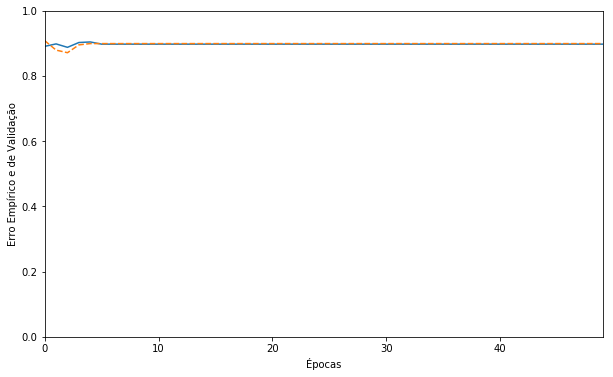

In [6]:
plot_history(model(n_hidden=100, batch_size=5000, learning_rate=10))
plt.show()

Train on 4000 samples, validate on 1000 samples
Epoch 1/50
4000/4000 [==============================] - 0s 84us/step - loss: 2.4584 - acc: 0.0983 - val_loss: 8.4834 - val_acc: 0.1210
Epoch 2/50
4000/4000 [==============================] - 0s 53us/step - loss: 8.4542 - acc: 0.1125 - val_loss: 6.5344 - val_acc: 0.1120
Epoch 3/50
4000/4000 [==============================] - 0s 54us/step - loss: 6.1149 - acc: 0.1045 - val_loss: 9.9414 - val_acc: 0.0840
Epoch 4/50
4000/4000 [==============================] - 0s 77us/step - loss: 9.3150 - acc: 0.0945 - val_loss: 11.5892 - val_acc: 0.1050
Epoch 5/50
4000/4000 [==============================] - 0s 62us/step - loss: 11.4666 - acc: 0.0960 - val_loss: 13.6342 - val_acc: 0.0840
Epoch 6/50
4000/4000 [==============================] - 0s 54us/step - loss: 13.4580 - acc: 0.0930 - val_loss: 14.6674 - val_acc: 0.0900
Epoch 7/50
4000/4000 [==============================] - 0s 62us/step - loss: 14.6272 - acc: 0.0925 - val_loss: 14.6674 - val_acc: 0.0900


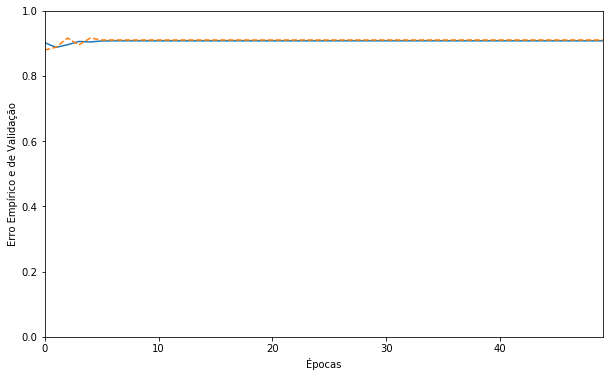

In [7]:
plot_history(model(n_hidden=50, batch_size=5000, learning_rate=10))
plt.show()

Train on 4000 samples, validate on 1000 samples
Epoch 1/50
4000/4000 [==============================] - 0s 95us/step - loss: 2.4016 - acc: 0.0940 - val_loss: 4.2223 - val_acc: 0.0820
Epoch 2/50
4000/4000 [==============================] - 0s 54us/step - loss: 4.1215 - acc: 0.1045 - val_loss: 4.5358 - val_acc: 0.1210
Epoch 3/50
4000/4000 [==============================] - 0s 54us/step - loss: 5.0059 - acc: 0.1125 - val_loss: 6.9172 - val_acc: 0.1050
Epoch 4/50
4000/4000 [==============================] - 0s 55us/step - loss: 6.9408 - acc: 0.0960 - val_loss: 6.2202 - val_acc: 0.1120
Epoch 5/50
4000/4000 [==============================] - 0s 55us/step - loss: 6.3710 - acc: 0.1045 - val_loss: 6.7644 - val_acc: 0.1010
Epoch 6/50
4000/4000 [==============================] - 0s 55us/step - loss: 6.9094 - acc: 0.1028 - val_loss: 9.0902 - val_acc: 0.0920
Epoch 7/50
4000/4000 [==============================] - 0s 57us/step - loss: 9.0772 - acc: 0.1020 - val_loss: 9.4925 - val_acc: 0.1290
Epoch 8

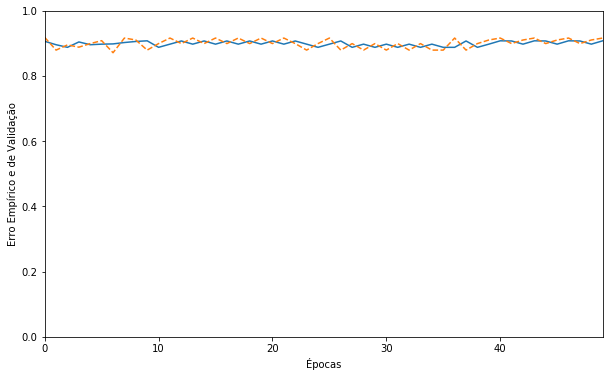

In [8]:
plot_history(model(n_hidden=25, batch_size=5000, learning_rate=10))
plt.show()

Em seguida o tamanho do batch foi mudado para 50, mantendo a taxa de aprendizado igual a 10 e variando a quantidade de unidades na camada oculta em 100, 50 e 25. Como se pode notar, o mesmo problema de mínimo local do gradiente aconteceu, por conta da alta taxa de aprendizado, provocando erros muito altos, tanto empíricos quanto de teste. Ainda, por conta do menor tamanho de batchs, o modelo demorou muito mais tempo para executar. Os gráficos deles podem ser vistos a seguir, com unidades na camada oculta com os respectivos valores 100, 50, e 25.
![alt text](images/121.png)
![alt text](images/122.png)
![alt text](images/123.png)

Train on 4000 samples, validate on 1000 samples
Epoch 1/50
4000/4000 [==============================] - 1s 313us/step - loss: 14.2444 - acc: 0.1052 - val_loss: 14.7964 - val_acc: 0.0820
Epoch 2/50
4000/4000 [==============================] - 1s 249us/step - loss: 14.4338 - acc: 0.1045 - val_loss: 14.7964 - val_acc: 0.0820
Epoch 3/50
4000/4000 [==============================] - 1s 248us/step - loss: 14.4338 - acc: 0.1045 - val_loss: 14.7964 - val_acc: 0.0820
Epoch 4/50
4000/4000 [==============================] - 1s 255us/step - loss: 14.4338 - acc: 0.1045 - val_loss: 14.7964 - val_acc: 0.0820
Epoch 5/50
4000/4000 [==============================] - 1s 257us/step - loss: 14.4338 - acc: 0.1045 - val_loss: 14.7964 - val_acc: 0.0820
Epoch 6/50
4000/4000 [==============================] - 1s 251us/step - loss: 14.4338 - acc: 0.1045 - val_loss: 14.7964 - val_acc: 0.0820
Epoch 7/50
4000/4000 [==============================] - 1s 255us/step - loss: 14.4338 - acc: 0.1045 - val_loss: 14.7964 - va

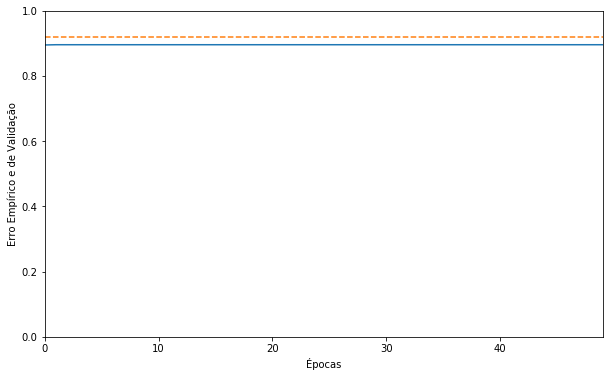

In [9]:
plot_history(model(n_hidden=100, batch_size=50, learning_rate=10))
plt.show()

Train on 4000 samples, validate on 1000 samples
Epoch 1/50
4000/4000 [==============================] - 2s 383us/step - loss: 14.4322 - acc: 0.0952 - val_loss: 14.4257 - val_acc: 0.1050
Epoch 2/50
4000/4000 [==============================] - 1s 367us/step - loss: 14.5708 - acc: 0.0960 - val_loss: 14.4257 - val_acc: 0.1050
Epoch 3/50
4000/4000 [==============================] - 1s 346us/step - loss: 14.5708 - acc: 0.0960 - val_loss: 14.4257 - val_acc: 0.1050
Epoch 4/50
4000/4000 [==============================] - 2s 383us/step - loss: 14.5708 - acc: 0.0960 - val_loss: 14.4257 - val_acc: 0.1050
Epoch 5/50
4000/4000 [==============================] - 1s 303us/step - loss: 14.5708 - acc: 0.0960 - val_loss: 14.4257 - val_acc: 0.1050
Epoch 6/50
4000/4000 [==============================] - 1s 290us/step - loss: 14.5708 - acc: 0.0960 - val_loss: 14.4257 - val_acc: 0.1050
Epoch 7/50
4000/4000 [==============================] - 1s 285us/step - loss: 14.5708 - acc: 0.0960 - val_loss: 14.4257 - va

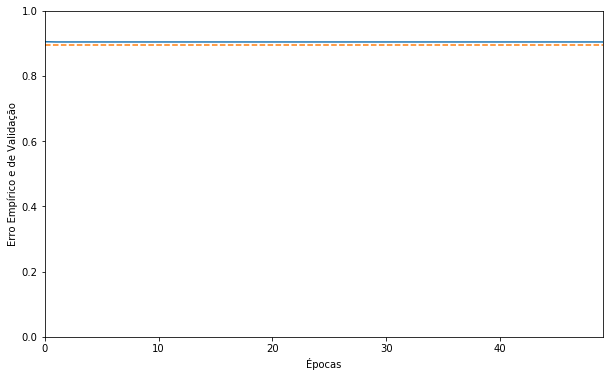

In [10]:
plot_history(model(n_hidden=50, batch_size=50, learning_rate=10))
plt.show()

Train on 4000 samples, validate on 1000 samples
Epoch 1/50
4000/4000 [==============================] - 1s 271us/step - loss: 14.2472 - acc: 0.0937 - val_loss: 14.7642 - val_acc: 0.0840
Epoch 2/50
4000/4000 [==============================] - 1s 235us/step - loss: 14.6191 - acc: 0.0930 - val_loss: 14.7642 - val_acc: 0.0840
Epoch 3/50
4000/4000 [==============================] - 1s 240us/step - loss: 14.6191 - acc: 0.0930 - val_loss: 14.7642 - val_acc: 0.0840
Epoch 4/50
4000/4000 [==============================] - 1s 238us/step - loss: 14.6191 - acc: 0.0930 - val_loss: 14.7642 - val_acc: 0.0840
Epoch 5/50
4000/4000 [==============================] - 1s 237us/step - loss: 14.6191 - acc: 0.0930 - val_loss: 14.7642 - val_acc: 0.0840
Epoch 6/50
4000/4000 [==============================] - 1s 283us/step - loss: 14.6191 - acc: 0.0930 - val_loss: 14.7642 - val_acc: 0.0840
Epoch 7/50
4000/4000 [==============================] - 1s 278us/step - loss: 14.6191 - acc: 0.0930 - val_loss: 14.7642 - va

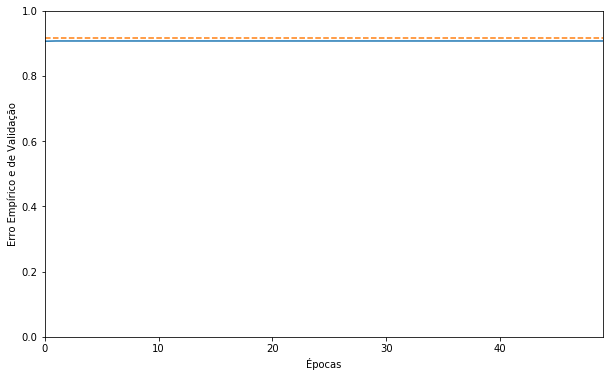

In [11]:
plot_history(model(n_hidden=25, batch_size=50, learning_rate=10))
plt.show()

Os próximos três modelos reduziram o tamanho do batch para 25, aumentando ainda mais o tempo de execução. Os mesmos problemas foram encontrados quanto aos mínimos locais, variando novamente as unidades de camada oculta entre 100, 50 e 25. Como os outros três modelos após estes também possuem as mesmas características, com tamanho de batch ainda menor, igual a um, eles também se encaixam aqui, e o gráfico de erros destes seis modelos pode ser visto a seguir.
![alt text](images/131.png)
![alt text](images/132.png)
![alt text](images/133.png)
![alt text](images/141.png)
![alt text](images/142.png)
![alt text](images/143.png)

Train on 4000 samples, validate on 1000 samples
Epoch 1/50
4000/4000 [==============================] - 2s 470us/step - loss: 14.4736 - acc: 0.0972 - val_loss: 14.0389 - val_acc: 0.1290
Epoch 2/50
4000/4000 [==============================] - 2s 423us/step - loss: 14.5426 - acc: 0.0977 - val_loss: 14.0389 - val_acc: 0.1290
Epoch 3/50
4000/4000 [==============================] - 2s 426us/step - loss: 14.5426 - acc: 0.0977 - val_loss: 14.0389 - val_acc: 0.1290
Epoch 4/50
4000/4000 [==============================] - 2s 429us/step - loss: 14.5426 - acc: 0.0977 - val_loss: 14.0389 - val_acc: 0.1290
Epoch 5/50
4000/4000 [==============================] - 2s 430us/step - loss: 14.5426 - acc: 0.0977 - val_loss: 14.0389 - val_acc: 0.1290
Epoch 6/50
4000/4000 [==============================] - 2s 432us/step - loss: 14.5426 - acc: 0.0977 - val_loss: 14.0389 - val_acc: 0.1290
Epoch 7/50
4000/4000 [==============================] - 2s 429us/step - loss: 14.5426 - acc: 0.0977 - val_loss: 14.0389 - va

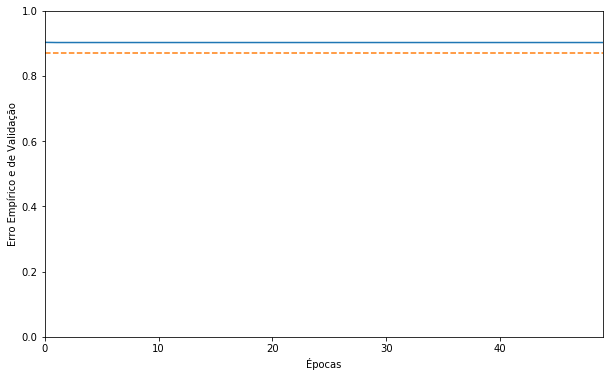

In [12]:
plot_history(model(n_hidden=100, batch_size=25, learning_rate=10))
plt.show()

Train on 4000 samples, validate on 1000 samples
Epoch 1/50
4000/4000 [==============================] - 2s 490us/step - loss: 14.3404 - acc: 0.1040 - val_loss: 14.7964 - val_acc: 0.0820
Epoch 2/50
4000/4000 [==============================] - 2s 422us/step - loss: 14.4338 - acc: 0.1045 - val_loss: 14.7964 - val_acc: 0.0820
Epoch 3/50
4000/4000 [==============================] - 2s 420us/step - loss: 14.4338 - acc: 0.1045 - val_loss: 14.7964 - val_acc: 0.0820
Epoch 4/50
4000/4000 [==============================] - 2s 421us/step - loss: 14.4338 - acc: 0.1045 - val_loss: 14.7964 - val_acc: 0.0820
Epoch 5/50
4000/4000 [==============================] - 2s 419us/step - loss: 14.4338 - acc: 0.1045 - val_loss: 14.7964 - val_acc: 0.0820
Epoch 6/50
4000/4000 [==============================] - 2s 416us/step - loss: 14.4338 - acc: 0.1045 - val_loss: 14.7964 - val_acc: 0.0820
Epoch 7/50
4000/4000 [==============================] - 2s 419us/step - loss: 14.4338 - acc: 0.1045 - val_loss: 14.7964 - va

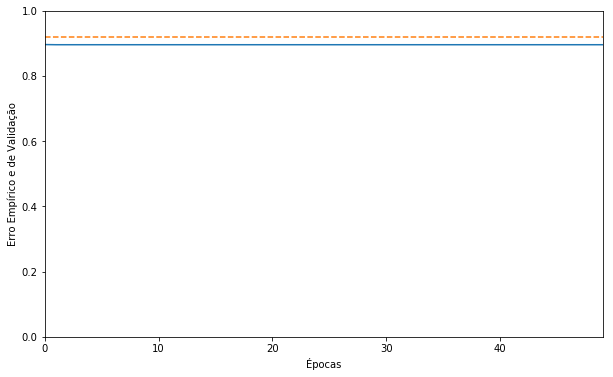

In [13]:
plot_history(model(n_hidden=50, batch_size=25, learning_rate=10))
plt.show()

Train on 4000 samples, validate on 1000 samples
Epoch 1/50
4000/4000 [==============================] - 2s 458us/step - loss: 14.4141 - acc: 0.0957 - val_loss: 14.4257 - val_acc: 0.1050
Epoch 2/50
4000/4000 [==============================] - 2s 408us/step - loss: 14.5708 - acc: 0.0960 - val_loss: 14.4257 - val_acc: 0.1050
Epoch 3/50
4000/4000 [==============================] - 2s 406us/step - loss: 14.5708 - acc: 0.0960 - val_loss: 14.4257 - val_acc: 0.1050
Epoch 4/50
4000/4000 [==============================] - 2s 409us/step - loss: 14.5708 - acc: 0.0960 - val_loss: 14.4257 - val_acc: 0.1050
Epoch 5/50
4000/4000 [==============================] - 2s 406us/step - loss: 14.5708 - acc: 0.0960 - val_loss: 14.4257 - val_acc: 0.1050
Epoch 6/50
4000/4000 [==============================] - 2s 408us/step - loss: 14.5708 - acc: 0.0960 - val_loss: 14.4257 - val_acc: 0.1050
Epoch 7/50
4000/4000 [==============================] - 2s 408us/step - loss: 14.5708 - acc: 0.0960 - val_loss: 14.4257 - va

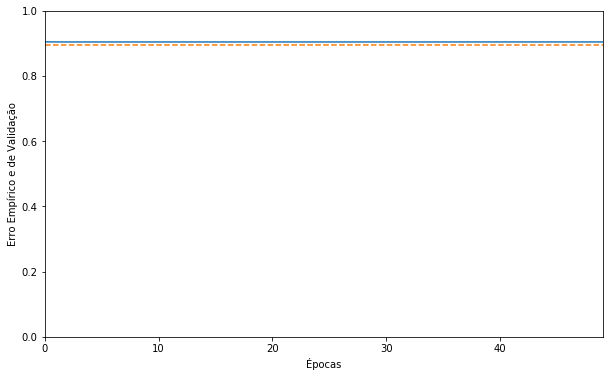

In [14]:
plot_history(model(n_hidden=25, batch_size=25, learning_rate=10))
plt.show()

Train on 4000 samples, validate on 1000 samples
Epoch 1/50
4000/4000 [==============================] - 33s 8ms/step - loss: 14.4626 - acc: 0.1025 - val_loss: 14.4902 - val_acc: 0.1010
Epoch 2/50
4000/4000 [==============================] - 33s 8ms/step - loss: 14.4620 - acc: 0.1028 - val_loss: 14.4902 - val_acc: 0.1010
Epoch 3/50
4000/4000 [==============================] - 33s 8ms/step - loss: 14.4620 - acc: 0.1028 - val_loss: 14.4902 - val_acc: 0.1010
Epoch 4/50
4000/4000 [==============================] - 33s 8ms/step - loss: 14.4620 - acc: 0.1028 - val_loss: 14.4902 - val_acc: 0.1010
Epoch 5/50
4000/4000 [==============================] - 33s 8ms/step - loss: 14.4620 - acc: 0.1028 - val_loss: 14.4902 - val_acc: 0.1010
Epoch 6/50
4000/4000 [==============================] - 33s 8ms/step - loss: 14.4620 - acc: 0.1028 - val_loss: 14.4902 - val_acc: 0.1010
Epoch 7/50
4000/4000 [==============================] - 33s 8ms/step - loss: 14.4620 - acc: 0.1028 - val_loss: 14.4902 - val_acc: 

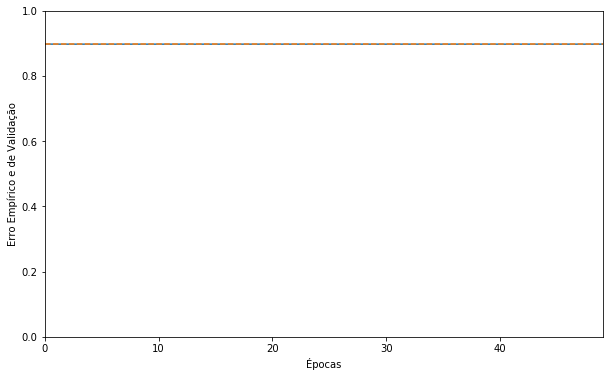

In [15]:
plot_history(model(n_hidden=100, batch_size=1, learning_rate=10))
plt.show()

Train on 4000 samples, validate on 1000 samples
Epoch 1/50
4000/4000 [==============================] - 33s 8ms/step - loss: 14.4343 - acc: 0.1042 - val_loss: 14.3129 - val_acc: 0.1120
Epoch 2/50
4000/4000 [==============================] - 32s 8ms/step - loss: 14.4338 - acc: 0.1045 - val_loss: 14.3129 - val_acc: 0.1120
Epoch 3/50
4000/4000 [==============================] - 32s 8ms/step - loss: 14.4338 - acc: 0.1045 - val_loss: 14.3129 - val_acc: 0.1120
Epoch 4/50
4000/4000 [==============================] - 32s 8ms/step - loss: 14.4338 - acc: 0.1045 - val_loss: 14.3129 - val_acc: 0.1120
Epoch 5/50
4000/4000 [==============================] - 32s 8ms/step - loss: 14.4338 - acc: 0.1045 - val_loss: 14.3129 - val_acc: 0.1120
Epoch 6/50
4000/4000 [==============================] - 32s 8ms/step - loss: 14.4338 - acc: 0.1045 - val_loss: 14.3129 - val_acc: 0.1120
Epoch 7/50
4000/4000 [==============================] - 32s 8ms/step - loss: 14.4338 - acc: 0.1045 - val_loss: 14.3129 - val_acc: 

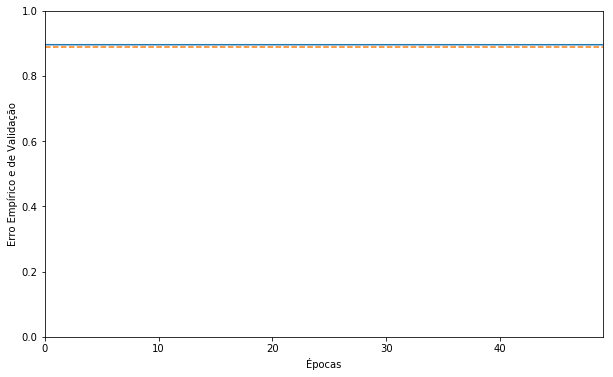

In [16]:
plot_history(model(n_hidden=50, batch_size=1, learning_rate=10))
plt.show()

Train on 4000 samples, validate on 1000 samples
Epoch 1/50
4000/4000 [==============================] - 32s 8ms/step - loss: 14.4344 - acc: 0.1042 - val_loss: 14.7964 - val_acc: 0.0820
Epoch 2/50
4000/4000 [==============================] - 32s 8ms/step - loss: 14.4338 - acc: 0.1045 - val_loss: 14.7964 - val_acc: 0.0820
Epoch 3/50
4000/4000 [==============================] - 32s 8ms/step - loss: 14.4338 - acc: 0.1045 - val_loss: 14.7964 - val_acc: 0.0820
Epoch 4/50
4000/4000 [==============================] - 32s 8ms/step - loss: 14.4338 - acc: 0.1045 - val_loss: 14.7964 - val_acc: 0.0820
Epoch 5/50
4000/4000 [==============================] - 32s 8ms/step - loss: 14.4338 - acc: 0.1045 - val_loss: 14.7964 - val_acc: 0.0820
Epoch 6/50
4000/4000 [==============================] - 32s 8ms/step - loss: 14.4338 - acc: 0.1045 - val_loss: 14.7964 - val_acc: 0.0820
Epoch 7/50
4000/4000 [==============================] - 32s 8ms/step - loss: 14.4338 - acc: 0.1045 - val_loss: 14.7964 - val_acc: 

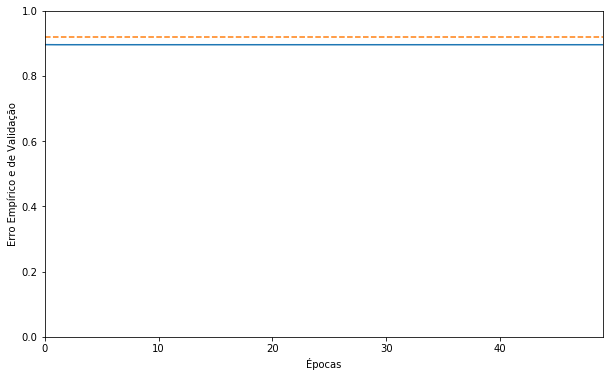

In [17]:
plot_history(model(n_hidden=25, batch_size=1, learning_rate=10))
plt.show()

Agora, com a redução da taxa de aprendizado para 1, e tamanho de batch igual a 5000, variando as unidades na camada oculta em 100, 50 e 25, o cenário melhorou bastante. Como o tamanho do batch é grande, os modelos convergiram bem rápido, e como a taxa de aprendizado foi diminuida, foi possível se escapar de mínimos locais na otimização da descida de gradiente. Assim, os modelos alcançaram resultados finais bem melhores, com erros de validação e empíricos abaixo de 20%. A variação das unidades na camada oculta alterou um pouco a estabilidade dos erros, mas o resultado final sempre ficou entre 15% e 20% de erro. É possível notar que o erro de validação tende a descolar do erro empírico a medida que o modelo converge, já que o erro de validação passa a se aproximar do erro real.
![alt text](images/211.png)
![alt text](images/212.png)
![alt text](images/213.png)

Train on 4000 samples, validate on 1000 samples
Epoch 1/50
4000/4000 [==============================] - 0s 122us/step - loss: 2.5127 - acc: 0.1020 - val_loss: 3.2751 - val_acc: 0.2660
Epoch 2/50
4000/4000 [==============================] - 0s 55us/step - loss: 3.2793 - acc: 0.2533 - val_loss: 3.2492 - val_acc: 0.1600
Epoch 3/50
4000/4000 [==============================] - 0s 57us/step - loss: 3.1409 - acc: 0.1800 - val_loss: 2.5047 - val_acc: 0.2980
Epoch 4/50
4000/4000 [==============================] - 0s 56us/step - loss: 2.5832 - acc: 0.2912 - val_loss: 2.0729 - val_acc: 0.3490
Epoch 5/50
4000/4000 [==============================] - 0s 57us/step - loss: 2.0865 - acc: 0.3458 - val_loss: 1.8892 - val_acc: 0.4530
Epoch 6/50
4000/4000 [==============================] - 0s 60us/step - loss: 1.8919 - acc: 0.4640 - val_loss: 1.7267 - val_acc: 0.5010
Epoch 7/50
4000/4000 [==============================] - 0s 65us/step - loss: 1.7205 - acc: 0.5188 - val_loss: 1.6041 - val_acc: 0.6000
Epoch 

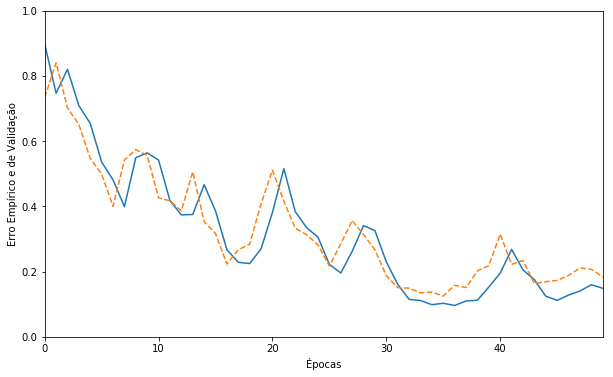

In [18]:
plot_history(model(n_hidden=100, batch_size=5000, learning_rate=1))
plt.show()

Train on 4000 samples, validate on 1000 samples
Epoch 1/50
4000/4000 [==============================] - 1s 139us/step - loss: 2.7257 - acc: 0.1125 - val_loss: 3.0767 - val_acc: 0.0820
Epoch 2/50
4000/4000 [==============================] - 0s 59us/step - loss: 2.9863 - acc: 0.1045 - val_loss: 2.6085 - val_acc: 0.2180
Epoch 3/50
4000/4000 [==============================] - 0s 54us/step - loss: 2.6095 - acc: 0.2148 - val_loss: 2.3622 - val_acc: 0.1120
Epoch 4/50
4000/4000 [==============================] - 0s 53us/step - loss: 2.3456 - acc: 0.1053 - val_loss: 2.1727 - val_acc: 0.3070
Epoch 5/50
4000/4000 [==============================] - 0s 54us/step - loss: 2.1655 - acc: 0.2855 - val_loss: 2.0727 - val_acc: 0.2300
Epoch 6/50
4000/4000 [==============================] - 0s 53us/step - loss: 2.0716 - acc: 0.2157 - val_loss: 2.0608 - val_acc: 0.3500
Epoch 7/50
4000/4000 [==============================] - 0s 54us/step - loss: 2.0363 - acc: 0.3745 - val_loss: 1.9065 - val_acc: 0.2890
Epoch 

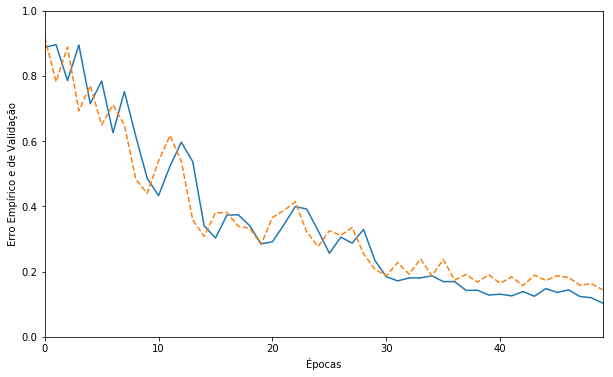

In [19]:
plot_history(model(n_hidden=50, batch_size=5000, learning_rate=1))
plt.show()

Train on 4000 samples, validate on 1000 samples
Epoch 1/50
4000/4000 [==============================] - 0s 124us/step - loss: 2.4215 - acc: 0.1037 - val_loss: 2.2278 - val_acc: 0.1750
Epoch 2/50
4000/4000 [==============================] - 0s 49us/step - loss: 2.2461 - acc: 0.1667 - val_loss: 2.0782 - val_acc: 0.2680
Epoch 3/50
4000/4000 [==============================] - 0s 63us/step - loss: 2.0702 - acc: 0.2885 - val_loss: 1.9350 - val_acc: 0.4570
Epoch 4/50
4000/4000 [==============================] - 0s 52us/step - loss: 1.9271 - acc: 0.4527 - val_loss: 1.8207 - val_acc: 0.4060
Epoch 5/50
4000/4000 [==============================] - 0s 54us/step - loss: 1.8256 - acc: 0.3882 - val_loss: 1.8056 - val_acc: 0.4800
Epoch 6/50
4000/4000 [==============================] - 0s 53us/step - loss: 1.7872 - acc: 0.4712 - val_loss: 2.0613 - val_acc: 0.2040
Epoch 7/50
4000/4000 [==============================] - 0s 53us/step - loss: 2.0273 - acc: 0.2013 - val_loss: 1.9475 - val_acc: 0.5000
Epoch 

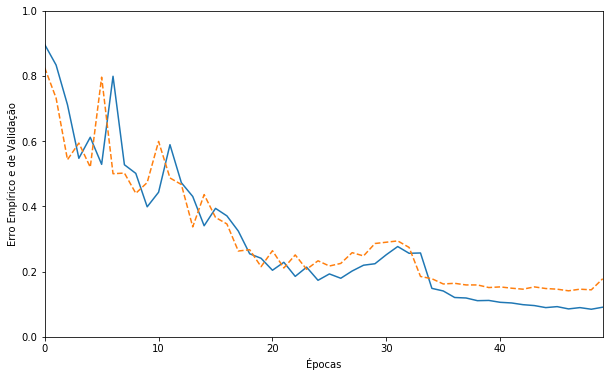

In [20]:
plot_history(model(n_hidden=25, batch_size=5000, learning_rate=1))
plt.show()

Train on 4000 samples, validate on 1000 samples
Epoch 1/50
4000/4000 [==============================] - 1s 317us/step - loss: 13.8845 - acc: 0.1062 - val_loss: 14.3129 - val_acc: 0.1120
Epoch 2/50
4000/4000 [==============================] - 1s 235us/step - loss: 14.4338 - acc: 0.1045 - val_loss: 14.3129 - val_acc: 0.1120
Epoch 3/50
4000/4000 [==============================] - 1s 240us/step - loss: 14.4338 - acc: 0.1045 - val_loss: 14.3129 - val_acc: 0.1120
Epoch 4/50
4000/4000 [==============================] - 1s 234us/step - loss: 14.4338 - acc: 0.1045 - val_loss: 14.3129 - val_acc: 0.1120
Epoch 5/50
4000/4000 [==============================] - 1s 245us/step - loss: 14.4338 - acc: 0.1045 - val_loss: 14.3129 - val_acc: 0.1120
Epoch 6/50
4000/4000 [==============================] - 1s 241us/step - loss: 14.4338 - acc: 0.1045 - val_loss: 14.3129 - val_acc: 0.1120
Epoch 7/50
4000/4000 [==============================] - 1s 240us/step - loss: 14.4338 - acc: 0.1045 - val_loss: 14.3129 - va

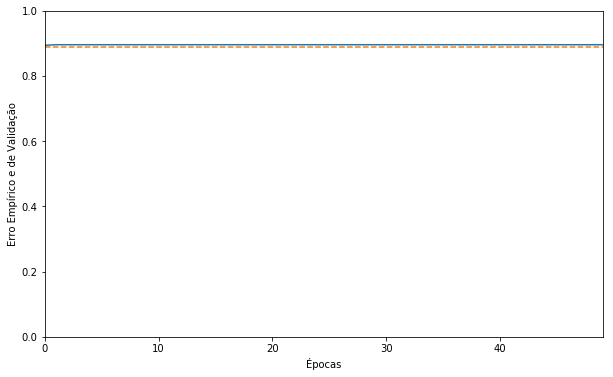

In [21]:
plot_history(model(n_hidden=100, batch_size=50, learning_rate=1))
plt.show()

Train on 4000 samples, validate on 1000 samples
Epoch 1/50
4000/4000 [==============================] - 1s 309us/step - loss: 10.6343 - acc: 0.1185 - val_loss: 12.0306 - val_acc: 0.0820
Epoch 2/50
4000/4000 [==============================] - 1s 231us/step - loss: 11.3895 - acc: 0.2125 - val_loss: 11.5608 - val_acc: 0.2080
Epoch 3/50
4000/4000 [==============================] - 1s 230us/step - loss: 11.4114 - acc: 0.2182 - val_loss: 11.4748 - val_acc: 0.2690
Epoch 4/50
4000/4000 [==============================] - 1s 233us/step - loss: 6.2856 - acc: 0.1420 - val_loss: 3.6869 - val_acc: 0.2060
Epoch 5/50
4000/4000 [==============================] - 1s 237us/step - loss: 4.5240 - acc: 0.1067 - val_loss: 3.6683 - val_acc: 0.0820
Epoch 6/50
4000/4000 [==============================] - 1s 231us/step - loss: 4.0761 - acc: 0.1127 - val_loss: 3.0960 - val_acc: 0.0840
Epoch 7/50
4000/4000 [==============================] - 1s 236us/step - loss: 3.1051 - acc: 0.1890 - val_loss: 2.7860 - val_acc: 0

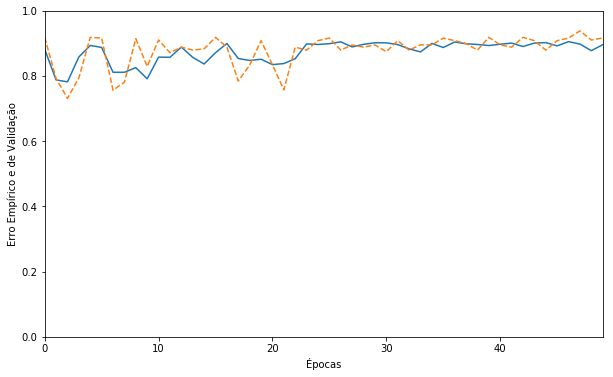

In [22]:
plot_history(model(n_hidden=50, batch_size=50, learning_rate=1))
plt.show()

Train on 4000 samples, validate on 1000 samples
Epoch 1/50
4000/4000 [==============================] - 1s 306us/step - loss: 1.9709 - acc: 0.2932 - val_loss: 1.7323 - val_acc: 0.3520
Epoch 2/50
4000/4000 [==============================] - 1s 226us/step - loss: 1.8059 - acc: 0.3613 - val_loss: 1.3497 - val_acc: 0.5080
Epoch 3/50
4000/4000 [==============================] - 1s 226us/step - loss: 1.7303 - acc: 0.3895 - val_loss: 2.0706 - val_acc: 0.3330
Epoch 4/50
4000/4000 [==============================] - 1s 225us/step - loss: 1.7104 - acc: 0.3965 - val_loss: 1.5242 - val_acc: 0.4320
Epoch 5/50
4000/4000 [==============================] - 1s 227us/step - loss: 1.8061 - acc: 0.3743 - val_loss: 2.4221 - val_acc: 0.2010
Epoch 6/50
4000/4000 [==============================] - 1s 233us/step - loss: 1.9039 - acc: 0.3512 - val_loss: 1.9279 - val_acc: 0.3690
Epoch 7/50
4000/4000 [==============================] - 1s 230us/step - loss: 1.7483 - acc: 0.4028 - val_loss: 1.4993 - val_acc: 0.4510


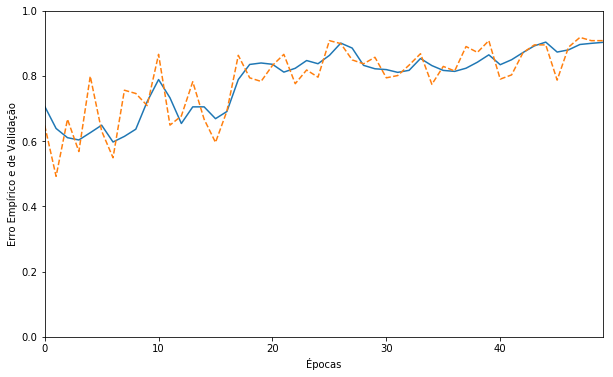

In [23]:
plot_history(model(n_hidden=25, batch_size=50, learning_rate=1))
plt.show()

Train on 4000 samples, validate on 1000 samples
Epoch 1/50
4000/4000 [==============================] - 2s 473us/step - loss: 14.1730 - acc: 0.0952 - val_loss: 14.7642 - val_acc: 0.0840
Epoch 2/50
4000/4000 [==============================] - 2s 387us/step - loss: 14.5949 - acc: 0.0945 - val_loss: 14.7642 - val_acc: 0.0840
Epoch 3/50
4000/4000 [==============================] - 2s 390us/step - loss: 14.5949 - acc: 0.0945 - val_loss: 14.7642 - val_acc: 0.0840
Epoch 4/50
4000/4000 [==============================] - 2s 394us/step - loss: 14.5949 - acc: 0.0945 - val_loss: 14.7642 - val_acc: 0.0840
Epoch 5/50
4000/4000 [==============================] - 2s 397us/step - loss: 14.5949 - acc: 0.0945 - val_loss: 14.7642 - val_acc: 0.0840
Epoch 6/50
4000/4000 [==============================] - 2s 392us/step - loss: 14.5949 - acc: 0.0945 - val_loss: 14.7642 - val_acc: 0.0840
Epoch 7/50
4000/4000 [==============================] - 2s 397us/step - loss: 14.5949 - acc: 0.0945 - val_loss: 14.7642 - va

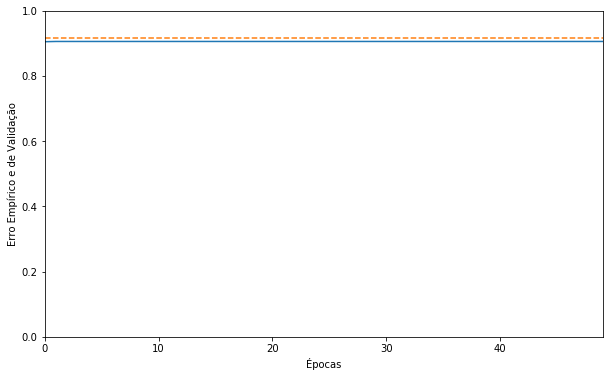

In [24]:
plot_history(model(n_hidden=100, batch_size=25, learning_rate=1))
plt.show()

Train on 4000 samples, validate on 1000 samples
Epoch 1/50
4000/4000 [==============================] - 2s 482us/step - loss: 12.4592 - acc: 0.1147 - val_loss: 13.5310 - val_acc: 0.1010
Epoch 2/50
4000/4000 [==============================] - 2s 394us/step - loss: 13.4845 - acc: 0.1162 - val_loss: 14.4257 - val_acc: 0.1050
Epoch 3/50
4000/4000 [==============================] - 2s 401us/step - loss: 14.5708 - acc: 0.0960 - val_loss: 14.4257 - val_acc: 0.1050
Epoch 4/50
4000/4000 [==============================] - 2s 398us/step - loss: 14.5708 - acc: 0.0960 - val_loss: 14.4257 - val_acc: 0.1050
Epoch 5/50
4000/4000 [==============================] - 2s 420us/step - loss: 14.5708 - acc: 0.0960 - val_loss: 14.4257 - val_acc: 0.1050
Epoch 6/50
4000/4000 [==============================] - 2s 392us/step - loss: 14.5708 - acc: 0.0960 - val_loss: 14.4257 - val_acc: 0.1050
Epoch 7/50
4000/4000 [==============================] - 2s 402us/step - loss: 14.5708 - acc: 0.0960 - val_loss: 14.4257 - va

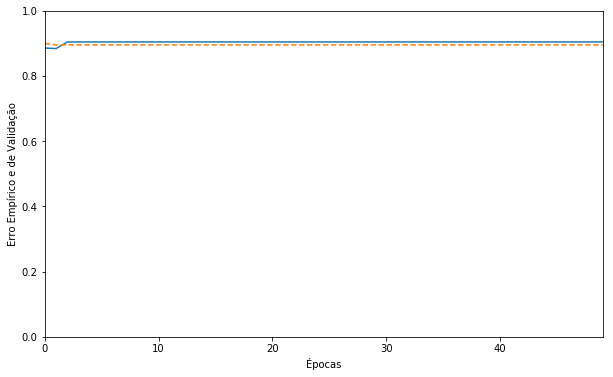

In [25]:
plot_history(model(n_hidden=50, batch_size=25, learning_rate=1))
plt.show()

Train on 4000 samples, validate on 1000 samples
Epoch 1/50
4000/4000 [==============================] - 2s 455us/step - loss: 2.7197 - acc: 0.1640 - val_loss: 2.0787 - val_acc: 0.2240
Epoch 2/50
4000/4000 [==============================] - 1s 359us/step - loss: 2.3195 - acc: 0.1997 - val_loss: 2.4705 - val_acc: 0.1600
Epoch 3/50
4000/4000 [==============================] - 1s 362us/step - loss: 2.5966 - acc: 0.1242 - val_loss: 2.4983 - val_acc: 0.1120
Epoch 4/50
4000/4000 [==============================] - 1s 362us/step - loss: 2.5546 - acc: 0.1200 - val_loss: 2.2271 - val_acc: 0.2090
Epoch 5/50
4000/4000 [==============================] - 1s 369us/step - loss: 2.6031 - acc: 0.1695 - val_loss: 2.5227 - val_acc: 0.0840
Epoch 6/50
4000/4000 [==============================] - 1s 363us/step - loss: 2.6473 - acc: 0.1307 - val_loss: 3.0849 - val_acc: 0.0840
Epoch 7/50
4000/4000 [==============================] - 1s 364us/step - loss: 2.7164 - acc: 0.1367 - val_loss: 2.8151 - val_acc: 0.1350


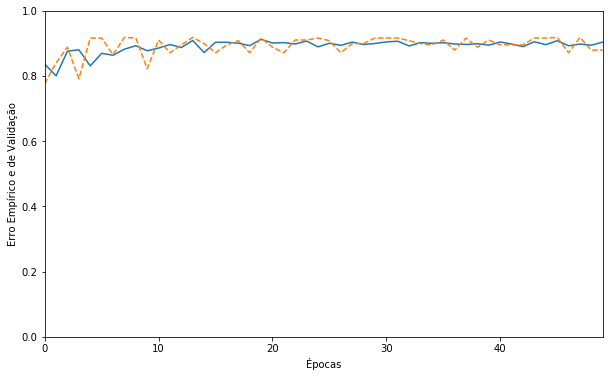

In [26]:
plot_history(model(n_hidden=25, batch_size=25, learning_rate=1))
plt.show()

Train on 4000 samples, validate on 1000 samples
Epoch 1/50
4000/4000 [==============================] - 29s 7ms/step - loss: 14.4341 - acc: 0.1045 - val_loss: 14.7964 - val_acc: 0.0820
Epoch 2/50
4000/4000 [==============================] - 29s 7ms/step - loss: 14.4338 - acc: 0.1045 - val_loss: 14.7964 - val_acc: 0.0820
Epoch 3/50
4000/4000 [==============================] - 29s 7ms/step - loss: 14.4338 - acc: 0.1045 - val_loss: 14.7964 - val_acc: 0.0820
Epoch 4/50
4000/4000 [==============================] - 29s 7ms/step - loss: 14.4338 - acc: 0.1045 - val_loss: 14.7964 - val_acc: 0.0820
Epoch 5/50
4000/4000 [==============================] - 29s 7ms/step - loss: 14.4338 - acc: 0.1045 - val_loss: 14.7964 - val_acc: 0.0820
Epoch 6/50
4000/4000 [==============================] - 29s 7ms/step - loss: 14.4338 - acc: 0.1045 - val_loss: 14.7964 - val_acc: 0.0820
Epoch 7/50
4000/4000 [==============================] - 29s 7ms/step - loss: 14.4338 - acc: 0.1045 - val_loss: 14.7964 - val_acc: 

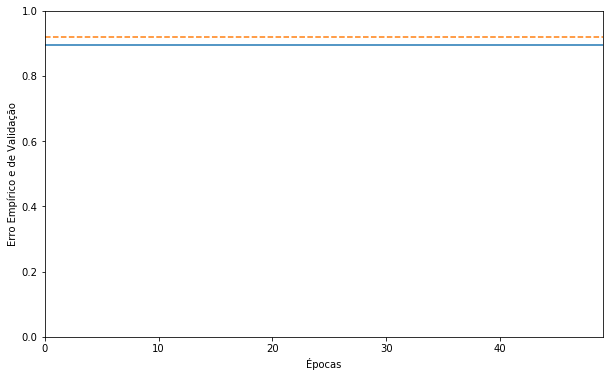

In [27]:
plot_history(model(n_hidden=100, batch_size=1, learning_rate=1))
plt.show()

Train on 4000 samples, validate on 1000 samples
Epoch 1/50
4000/4000 [==============================] - 28s 7ms/step - loss: 14.6196 - acc: 0.0927 - val_loss: 14.7642 - val_acc: 0.0840
Epoch 2/50
4000/4000 [==============================] - 28s 7ms/step - loss: 14.6191 - acc: 0.0930 - val_loss: 14.7642 - val_acc: 0.0840
Epoch 3/50
4000/4000 [==============================] - 28s 7ms/step - loss: 14.6191 - acc: 0.0930 - val_loss: 14.7642 - val_acc: 0.0840
Epoch 4/50
4000/4000 [==============================] - 28s 7ms/step - loss: 14.6191 - acc: 0.0930 - val_loss: 14.7642 - val_acc: 0.0840
Epoch 5/50
4000/4000 [==============================] - 28s 7ms/step - loss: 14.6191 - acc: 0.0930 - val_loss: 14.7642 - val_acc: 0.0840
Epoch 6/50
4000/4000 [==============================] - 28s 7ms/step - loss: 14.6191 - acc: 0.0930 - val_loss: 14.7642 - val_acc: 0.0840
Epoch 7/50
4000/4000 [==============================] - 28s 7ms/step - loss: 14.6191 - acc: 0.0930 - val_loss: 14.7642 - val_acc: 

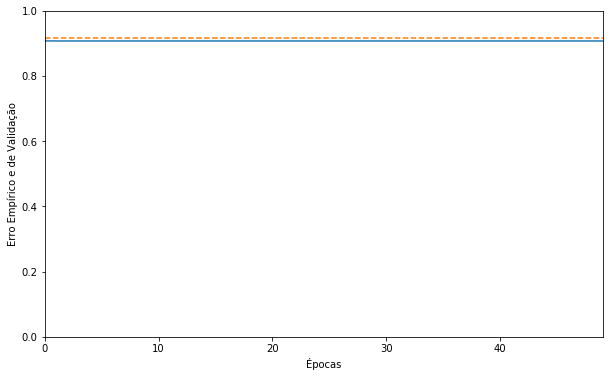

In [28]:
plot_history(model(n_hidden=50, batch_size=1, learning_rate=1))
plt.show()

Train on 4000 samples, validate on 1000 samples
Epoch 1/50
4000/4000 [==============================] - 27s 7ms/step - loss: 14.6193 - acc: 0.0927 - val_loss: 14.7642 - val_acc: 0.0840
Epoch 2/50
4000/4000 [==============================] - 27s 7ms/step - loss: 14.6191 - acc: 0.0930 - val_loss: 14.7642 - val_acc: 0.0840
Epoch 3/50
4000/4000 [==============================] - 27s 7ms/step - loss: 14.6191 - acc: 0.0930 - val_loss: 14.7642 - val_acc: 0.0840
Epoch 4/50
4000/4000 [==============================] - 27s 7ms/step - loss: 14.6191 - acc: 0.0930 - val_loss: 14.7642 - val_acc: 0.0840
Epoch 5/50
4000/4000 [==============================] - 27s 7ms/step - loss: 14.6191 - acc: 0.0930 - val_loss: 14.7642 - val_acc: 0.0840
Epoch 6/50
4000/4000 [==============================] - 27s 7ms/step - loss: 14.6191 - acc: 0.0930 - val_loss: 14.7642 - val_acc: 0.0840
Epoch 7/50
4000/4000 [==============================] - 27s 7ms/step - loss: 14.6191 - acc: 0.0930 - val_loss: 14.7642 - val_acc: 

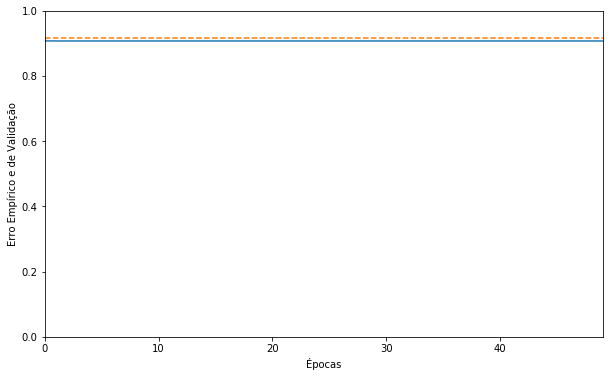

In [29]:
plot_history(model(n_hidden=25, batch_size=1, learning_rate=1))
plt.show()

Train on 4000 samples, validate on 1000 samples
Epoch 1/50
4000/4000 [==============================] - 1s 161us/step - loss: 2.4137 - acc: 0.0935 - val_loss: 2.3326 - val_acc: 0.2230
Epoch 2/50
4000/4000 [==============================] - 0s 55us/step - loss: 2.3495 - acc: 0.2105 - val_loss: 2.2336 - val_acc: 0.1760
Epoch 3/50
4000/4000 [==============================] - 0s 59us/step - loss: 2.1983 - acc: 0.1965 - val_loss: 2.2072 - val_acc: 0.2590
Epoch 4/50
4000/4000 [==============================] - 0s 58us/step - loss: 2.2310 - acc: 0.2772 - val_loss: 1.9460 - val_acc: 0.4510
Epoch 5/50
4000/4000 [==============================] - 0s 59us/step - loss: 1.9648 - acc: 0.4493 - val_loss: 1.7881 - val_acc: 0.4520
Epoch 6/50
4000/4000 [==============================] - 0s 64us/step - loss: 1.7471 - acc: 0.4825 - val_loss: 1.7505 - val_acc: 0.4430
Epoch 7/50
4000/4000 [==============================] - 0s 63us/step - loss: 1.7285 - acc: 0.4448 - val_loss: 1.6600 - val_acc: 0.6050
Epoch 

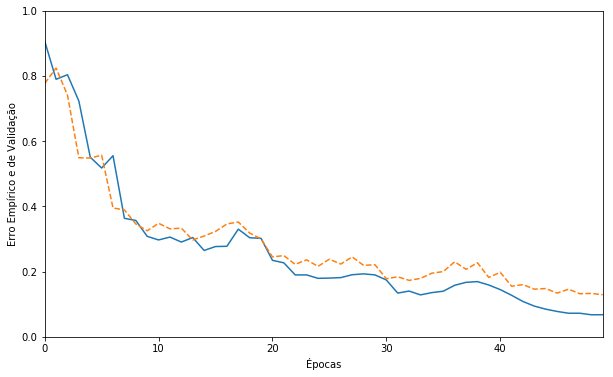

In [30]:
plot_history(model(n_hidden=100, batch_size=5000, learning_rate=0.5))
plt.show()

Train on 4000 samples, validate on 1000 samples
Epoch 1/50
4000/4000 [==============================] - 1s 163us/step - loss: 2.5970 - acc: 0.0625 - val_loss: 2.3093 - val_acc: 0.2320
Epoch 2/50
4000/4000 [==============================] - 0s 51us/step - loss: 2.3343 - acc: 0.1943 - val_loss: 2.0448 - val_acc: 0.4180
Epoch 3/50
4000/4000 [==============================] - 0s 54us/step - loss: 2.0089 - acc: 0.4390 - val_loss: 1.8151 - val_acc: 0.5430
Epoch 4/50
4000/4000 [==============================] - 0s 58us/step - loss: 1.8085 - acc: 0.5410 - val_loss: 1.7199 - val_acc: 0.5480
Epoch 5/50
4000/4000 [==============================] - 0s 54us/step - loss: 1.6879 - acc: 0.6003 - val_loss: 1.6388 - val_acc: 0.5300
Epoch 6/50
4000/4000 [==============================] - 0s 54us/step - loss: 1.6329 - acc: 0.5320 - val_loss: 1.6615 - val_acc: 0.5130
Epoch 7/50
4000/4000 [==============================] - 0s 54us/step - loss: 1.6096 - acc: 0.5550 - val_loss: 1.5726 - val_acc: 0.4920
Epoch 

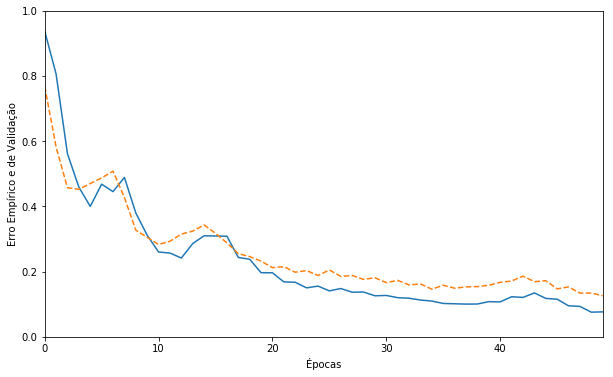

In [31]:
plot_history(model(n_hidden=50, batch_size=5000, learning_rate=0.5))
plt.show()

Train on 4000 samples, validate on 1000 samples
Epoch 1/50
4000/4000 [==============================] - 1s 185us/step - loss: 2.4955 - acc: 0.0975 - val_loss: 2.1918 - val_acc: 0.2740
Epoch 2/50
4000/4000 [==============================] - 0s 51us/step - loss: 2.1755 - acc: 0.2840 - val_loss: 2.0171 - val_acc: 0.4210
Epoch 3/50
4000/4000 [==============================] - 0s 54us/step - loss: 2.0035 - acc: 0.4437 - val_loss: 1.9080 - val_acc: 0.5170
Epoch 4/50
4000/4000 [==============================] - 0s 53us/step - loss: 1.8955 - acc: 0.5315 - val_loss: 1.8465 - val_acc: 0.4260
Epoch 5/50
4000/4000 [==============================] - 0s 52us/step - loss: 1.8249 - acc: 0.4723 - val_loss: 1.7980 - val_acc: 0.5240
Epoch 6/50
4000/4000 [==============================] - 0s 53us/step - loss: 1.7830 - acc: 0.5425 - val_loss: 1.7447 - val_acc: 0.4460
Epoch 7/50
4000/4000 [==============================] - 0s 53us/step - loss: 1.7177 - acc: 0.4947 - val_loss: 1.6987 - val_acc: 0.5310
Epoch 

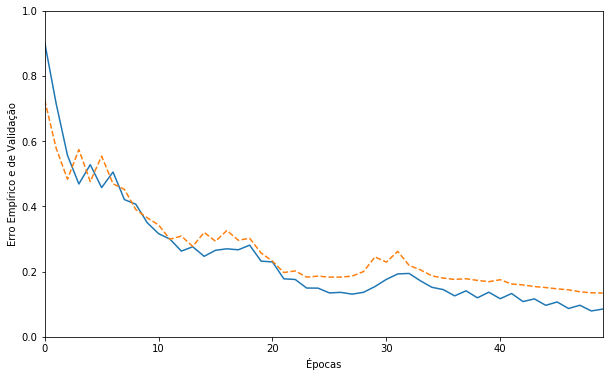

In [32]:
plot_history(model(n_hidden=25, batch_size=5000, learning_rate=0.5))
plt.show()

Train on 4000 samples, validate on 1000 samples
Epoch 1/50
4000/4000 [==============================] - 1s 337us/step - loss: 1.5898 - acc: 0.4710 - val_loss: 1.2226 - val_acc: 0.5500
Epoch 2/50
4000/4000 [==============================] - 1s 204us/step - loss: 1.1156 - acc: 0.6120 - val_loss: 0.8190 - val_acc: 0.7370
Epoch 3/50
4000/4000 [==============================] - 1s 201us/step - loss: 0.9894 - acc: 0.6590 - val_loss: 1.1159 - val_acc: 0.6110
Epoch 4/50
4000/4000 [==============================] - 1s 202us/step - loss: 0.9198 - acc: 0.6920 - val_loss: 0.7575 - val_acc: 0.7560
Epoch 5/50
4000/4000 [==============================] - 1s 206us/step - loss: 0.8783 - acc: 0.7025 - val_loss: 0.6779 - val_acc: 0.7520
Epoch 6/50
4000/4000 [==============================] - 1s 213us/step - loss: 0.8833 - acc: 0.7110 - val_loss: 0.9012 - val_acc: 0.6820
Epoch 7/50
4000/4000 [==============================] - 1s 214us/step - loss: 0.9065 - acc: 0.6908 - val_loss: 1.0257 - val_acc: 0.6490


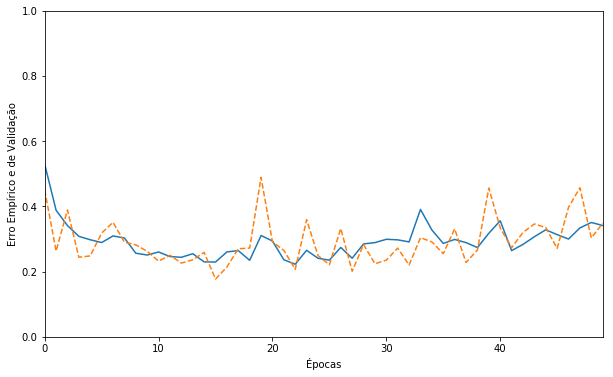

In [33]:
plot_history(model(n_hidden=100, batch_size=50, learning_rate=0.5))
plt.show()

Train on 4000 samples, validate on 1000 samples
Epoch 1/50
4000/4000 [==============================] - 1s 317us/step - loss: 1.5980 - acc: 0.4623 - val_loss: 1.2879 - val_acc: 0.5000
Epoch 2/50
4000/4000 [==============================] - 1s 197us/step - loss: 1.1397 - acc: 0.6010 - val_loss: 1.1571 - val_acc: 0.5900
Epoch 3/50
4000/4000 [==============================] - 1s 199us/step - loss: 1.0644 - acc: 0.6260 - val_loss: 0.9489 - val_acc: 0.6650
Epoch 4/50
4000/4000 [==============================] - 1s 195us/step - loss: 1.0240 - acc: 0.6445 - val_loss: 0.8251 - val_acc: 0.6790
Epoch 5/50
4000/4000 [==============================] - 1s 197us/step - loss: 0.9540 - acc: 0.6760 - val_loss: 0.9089 - val_acc: 0.6880
Epoch 6/50
4000/4000 [==============================] - 1s 197us/step - loss: 0.8489 - acc: 0.7027 - val_loss: 0.8808 - val_acc: 0.7230
Epoch 7/50
4000/4000 [==============================] - 1s 195us/step - loss: 0.8450 - acc: 0.7075 - val_loss: 0.9426 - val_acc: 0.6610


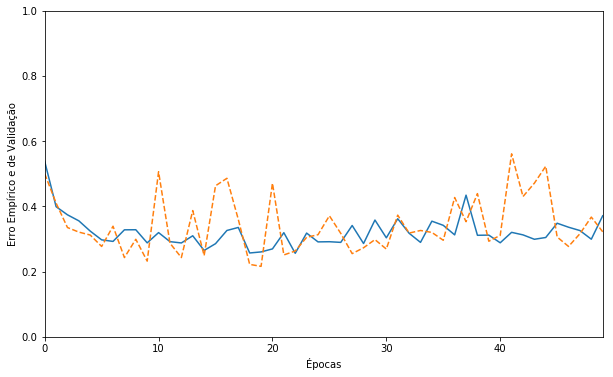

In [34]:
plot_history(model(n_hidden=50, batch_size=50, learning_rate=0.5))
plt.show()

Train on 4000 samples, validate on 1000 samples
Epoch 1/50
4000/4000 [==============================] - 1s 311us/step - loss: 1.5209 - acc: 0.4803 - val_loss: 1.0853 - val_acc: 0.6850
Epoch 2/50
4000/4000 [==============================] - 1s 196us/step - loss: 1.1332 - acc: 0.6158 - val_loss: 0.9786 - val_acc: 0.6400
Epoch 3/50
4000/4000 [==============================] - 1s 192us/step - loss: 0.9617 - acc: 0.6733 - val_loss: 0.8892 - val_acc: 0.7320
Epoch 4/50
4000/4000 [==============================] - 1s 193us/step - loss: 1.0495 - acc: 0.6383 - val_loss: 0.8016 - val_acc: 0.7340
Epoch 5/50
4000/4000 [==============================] - 1s 189us/step - loss: 0.9349 - acc: 0.6698 - val_loss: 0.9134 - val_acc: 0.6760
Epoch 6/50
4000/4000 [==============================] - 1s 193us/step - loss: 0.9848 - acc: 0.6563 - val_loss: 0.7532 - val_acc: 0.7450
Epoch 7/50
4000/4000 [==============================] - 1s 194us/step - loss: 0.9734 - acc: 0.6575 - val_loss: 0.7748 - val_acc: 0.7010


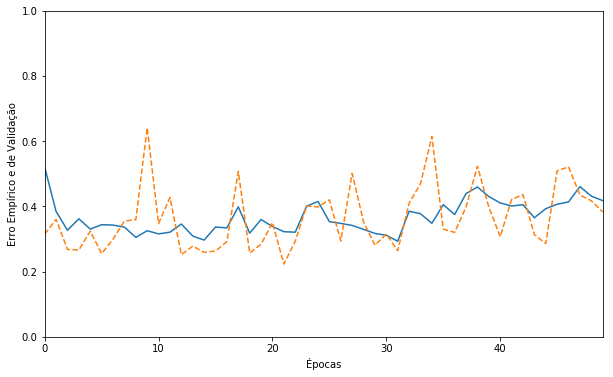

In [35]:
plot_history(model(n_hidden=25, batch_size=50, learning_rate=0.5))
plt.show()

Train on 4000 samples, validate on 1000 samples
Epoch 1/50
4000/4000 [==============================] - 2s 459us/step - loss: 2.0719 - acc: 0.3367 - val_loss: 1.1877 - val_acc: 0.5890
Epoch 2/50
4000/4000 [==============================] - 1s 336us/step - loss: 1.4265 - acc: 0.4988 - val_loss: 1.1922 - val_acc: 0.5800
Epoch 3/50
4000/4000 [==============================] - 1s 343us/step - loss: 1.3286 - acc: 0.5348 - val_loss: 1.1772 - val_acc: 0.5450
Epoch 4/50
4000/4000 [==============================] - 1s 340us/step - loss: 1.2909 - acc: 0.5508 - val_loss: 1.3034 - val_acc: 0.4930
Epoch 5/50
4000/4000 [==============================] - 1s 337us/step - loss: 1.2973 - acc: 0.5473 - val_loss: 1.0644 - val_acc: 0.5930
Epoch 6/50
4000/4000 [==============================] - 1s 339us/step - loss: 1.2664 - acc: 0.5545 - val_loss: 0.9931 - val_acc: 0.6400
Epoch 7/50
4000/4000 [==============================] - 1s 341us/step - loss: 1.2007 - acc: 0.5805 - val_loss: 1.8225 - val_acc: 0.3810


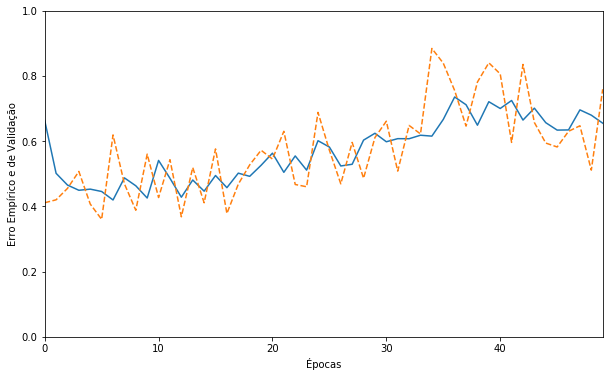

In [36]:
plot_history(model(n_hidden=100, batch_size=25, learning_rate=0.5))
plt.show()

Train on 4000 samples, validate on 1000 samples
Epoch 1/50
4000/4000 [==============================] - 2s 457us/step - loss: 1.8201 - acc: 0.3765 - val_loss: 1.5982 - val_acc: 0.4080
Epoch 2/50
4000/4000 [==============================] - 1s 336us/step - loss: 1.5031 - acc: 0.4692 - val_loss: 1.2542 - val_acc: 0.5050
Epoch 3/50
4000/4000 [==============================] - 1s 326us/step - loss: 1.3460 - acc: 0.5205 - val_loss: 1.3482 - val_acc: 0.4820
Epoch 4/50
4000/4000 [==============================] - 1s 327us/step - loss: 1.3524 - acc: 0.5268 - val_loss: 1.3093 - val_acc: 0.5080
Epoch 5/50
4000/4000 [==============================] - 1s 330us/step - loss: 1.3361 - acc: 0.5210 - val_loss: 1.0278 - val_acc: 0.6080
Epoch 6/50
4000/4000 [==============================] - 1s 331us/step - loss: 1.3059 - acc: 0.5498 - val_loss: 1.1001 - val_acc: 0.6040
Epoch 7/50
4000/4000 [==============================] - 1s 327us/step - loss: 1.4037 - acc: 0.5087 - val_loss: 1.1240 - val_acc: 0.5450


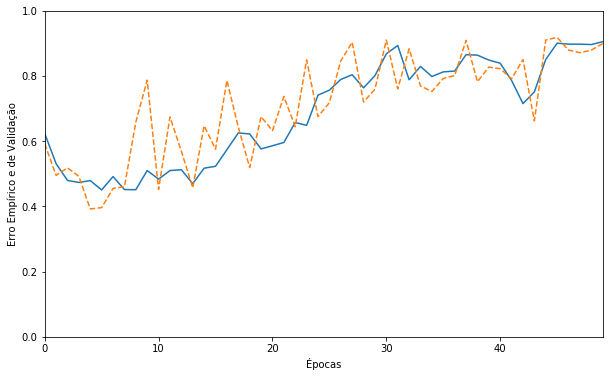

In [37]:
plot_history(model(n_hidden=50, batch_size=25, learning_rate=0.5))
plt.show()

Train on 4000 samples, validate on 1000 samples
Epoch 1/50
4000/4000 [==============================] - 2s 452us/step - loss: 1.7031 - acc: 0.3820 - val_loss: 1.4790 - val_acc: 0.5060
Epoch 2/50
4000/4000 [==============================] - 1s 323us/step - loss: 1.4285 - acc: 0.4923 - val_loss: 1.3481 - val_acc: 0.4830
Epoch 3/50
4000/4000 [==============================] - 1s 323us/step - loss: 1.4775 - acc: 0.4785 - val_loss: 1.2684 - val_acc: 0.5550
Epoch 4/50
4000/4000 [==============================] - 1s 320us/step - loss: 1.3891 - acc: 0.5015 - val_loss: 1.5233 - val_acc: 0.5230
Epoch 5/50
4000/4000 [==============================] - 1s 321us/step - loss: 1.3673 - acc: 0.5160 - val_loss: 1.1419 - val_acc: 0.6200
Epoch 6/50
4000/4000 [==============================] - 1s 322us/step - loss: 1.3604 - acc: 0.5060 - val_loss: 1.1229 - val_acc: 0.6410
Epoch 7/50
4000/4000 [==============================] - 1s 330us/step - loss: 1.4341 - acc: 0.4765 - val_loss: 1.6988 - val_acc: 0.3710


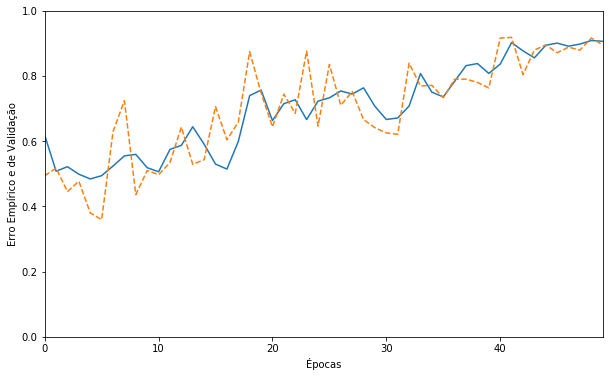

In [38]:
plot_history(model(n_hidden=25, batch_size=25, learning_rate=0.5))
plt.show()

Train on 4000 samples, validate on 1000 samples
Epoch 1/50
4000/4000 [==============================] - 25s 6ms/step - loss: 4.8838 - acc: 0.1042 - val_loss: 5.2500 - val_acc: 0.1210
Epoch 2/50
4000/4000 [==============================] - 25s 6ms/step - loss: 5.8572 - acc: 0.0995 - val_loss: 6.2203 - val_acc: 0.1120
Epoch 3/50
4000/4000 [==============================] - 25s 6ms/step - loss: 5.7457 - acc: 0.1023 - val_loss: 5.3381 - val_acc: 0.1050
Epoch 4/50
4000/4000 [==============================] - 25s 6ms/step - loss: 5.7334 - acc: 0.0955 - val_loss: 5.3736 - val_acc: 0.1290
Epoch 5/50
4000/4000 [==============================] - 25s 6ms/step - loss: 5.7998 - acc: 0.1020 - val_loss: 5.8435 - val_acc: 0.1210
Epoch 6/50
4000/4000 [==============================] - 25s 6ms/step - loss: 6.0607 - acc: 0.0975 - val_loss: 6.4365 - val_acc: 0.1210
Epoch 7/50
4000/4000 [==============================] - 25s 6ms/step - loss: 5.7059 - acc: 0.1060 - val_loss: 5.5712 - val_acc: 0.1290
Epoch 8

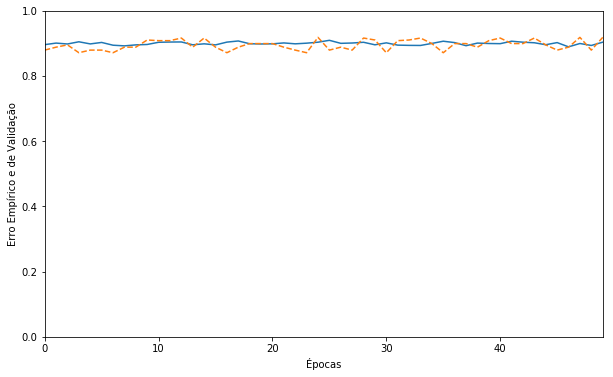

In [39]:
plot_history(model(n_hidden=100, batch_size=1, learning_rate=0.5))
plt.show()

Train on 4000 samples, validate on 1000 samples
Epoch 1/50
4000/4000 [==============================] - 24s 6ms/step - loss: 3.6358 - acc: 0.1023 - val_loss: 3.2592 - val_acc: 0.1210
Epoch 2/50
4000/4000 [==============================] - 24s 6ms/step - loss: 3.5319 - acc: 0.1000 - val_loss: 3.2090 - val_acc: 0.0920
Epoch 3/50
4000/4000 [==============================] - 24s 6ms/step - loss: 3.7320 - acc: 0.0950 - val_loss: 4.3875 - val_acc: 0.0840
Epoch 4/50
4000/4000 [==============================] - 24s 6ms/step - loss: 3.7996 - acc: 0.0983 - val_loss: 4.1117 - val_acc: 0.0820
Epoch 5/50
4000/4000 [==============================] - 24s 6ms/step - loss: 3.8542 - acc: 0.1075 - val_loss: 4.2841 - val_acc: 0.1290
Epoch 6/50
4000/4000 [==============================] - 24s 6ms/step - loss: 4.0082 - acc: 0.1042 - val_loss: 4.4584 - val_acc: 0.0900
Epoch 7/50
4000/4000 [==============================] - 24s 6ms/step - loss: 4.1789 - acc: 0.0955 - val_loss: 4.4612 - val_acc: 0.0840
Epoch 8

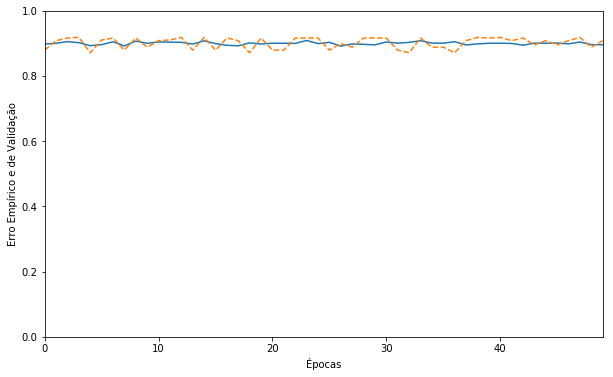

In [40]:
plot_history(model(n_hidden=50, batch_size=1, learning_rate=0.5))
plt.show()

Train on 4000 samples, validate on 1000 samples
Epoch 1/50
4000/4000 [==============================] - 24s 6ms/step - loss: 3.7163 - acc: 0.0990 - val_loss: 3.5698 - val_acc: 0.1290
Epoch 2/50
4000/4000 [==============================] - 23s 6ms/step - loss: 3.6309 - acc: 0.0953 - val_loss: 4.4747 - val_acc: 0.0900
Epoch 3/50
4000/4000 [==============================] - 23s 6ms/step - loss: 4.0839 - acc: 0.0980 - val_loss: 4.2375 - val_acc: 0.0820
Epoch 4/50
4000/4000 [==============================] - 24s 6ms/step - loss: 3.8059 - acc: 0.0943 - val_loss: 3.4374 - val_acc: 0.0840
Epoch 5/50
4000/4000 [==============================] - 23s 6ms/step - loss: 4.2690 - acc: 0.0997 - val_loss: 3.6220 - val_acc: 0.1050
Epoch 6/50
4000/4000 [==============================] - 23s 6ms/step - loss: 4.9228 - acc: 0.1030 - val_loss: 5.3269 - val_acc: 0.0920
Epoch 7/50
4000/4000 [==============================] - 23s 6ms/step - loss: 4.9930 - acc: 0.0992 - val_loss: 4.8382 - val_acc: 0.0840
Epoch 8

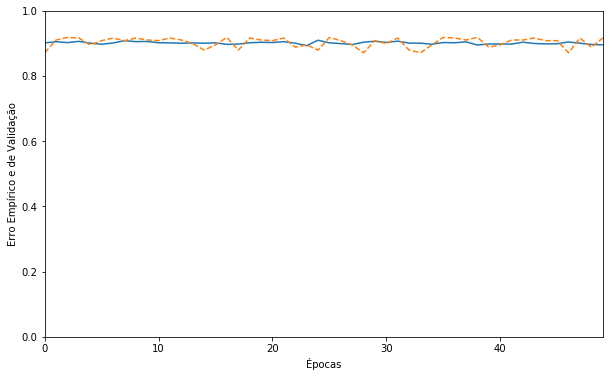

In [41]:
plot_history(model(n_hidden=25, batch_size=1, learning_rate=0.5))
plt.show()